# K-Nearest Neighbors: [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [ ]:
"""K-Nearest Neighbors is an algorithm for supervised learning. 
Where the data is 'trained' with data points corresponding to their classification.The nearest neighbors will determine
its classfication
The major consideration is :
1.How to choose the best K
"""

## Import data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# load the dataset
iris = datasets.load_iris()
iris.data.shape

(150, 4)

## Visualization

1
6
11
16


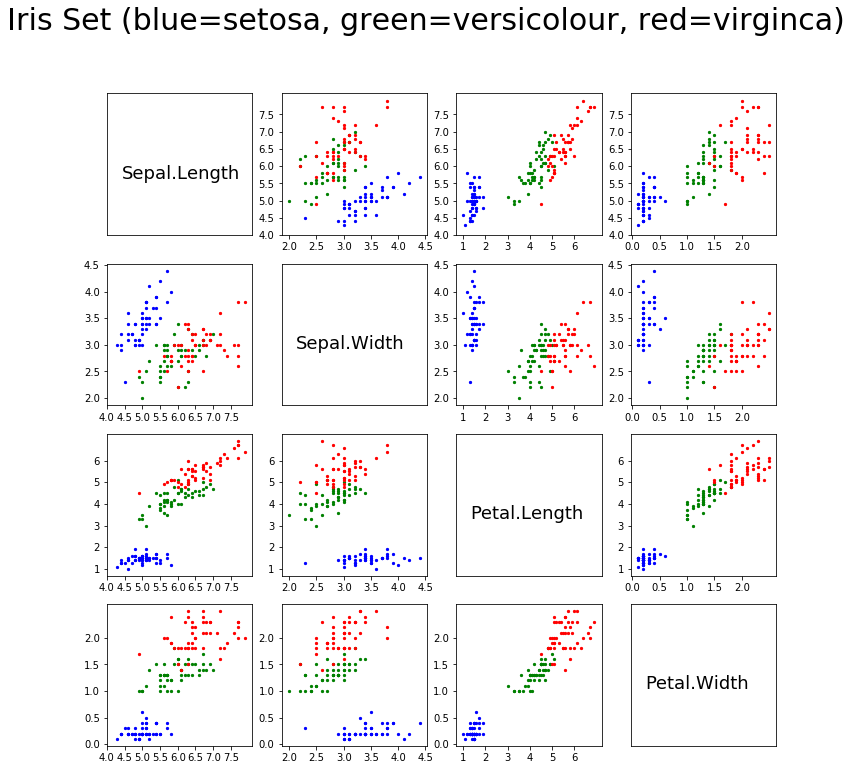

In [60]:
iris_setosa = iris.data[:50] 
 
iris_versicolor = iris.data[50:100]  
 
iris_virginica = iris.data[100:150] 

 
iris_setosa = np.hsplit(iris_setosa, 4) 
iris_versicolor = np.hsplit(iris_versicolor, 4)
iris_virginica = np.hsplit(iris_virginica, 4)


setosa = {'sepal_length': iris_setosa[0], 'sepal_width': iris_setosa[1], 'petal_length': iris_setosa[2],
          'petal_width': iris_setosa[3]}
 
versicolor = {'sepal_length': iris_versicolor[0], 'sepal_width': iris_versicolor[1], 'petal_length': iris_versicolor[2],
              'petal_width': iris_versicolor[3]}
 
virginica = {'sepal_length': iris_virginica[0], 'sepal_width': iris_virginica[1], 'petal_length': iris_virginica[2],
             'petal_width': iris_virginica[3]}
 
size = 5  # 散点的大小
setosa_color = 'b'  # 蓝色代表setosa
versicolor_color = 'g'  # 绿色代表versicolor
virginica_color = 'r'  # 红色代表virginica
 
sepal_width_ticks = np.arange(2, 5, step=0.5)  # sepal_length分度值和刻度范围
sepal_length_ticks = np.arange(4, 8, step=0.5)  # sepal_width分度值和刻度范围
petal_width_ticks = np.arange(0, 2.5, step=0.5)  # petal_width分度值和刻度范围
petal_length_ticks = np.arange(1, 7, step=1)  # petal_length分度值和刻度范围
 
ticks = [sepal_length_ticks, sepal_width_ticks, petal_length_ticks, petal_width_ticks]
label_text = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
 
# print(ticks)
 
plt.figure(figsize=(12, 12))  # 设置画布大小
plt.suptitle("Iris Set (blue=setosa, green=versicolour, red=virginca) ", fontsize=30)
 
for i in range(0, 4):
    for j in range(0, 4):
        plt.subplot(4, 4, i * 4 + j + 1) # 创建子画布
 
        if i == j:
            print(i*4+j+1) #序列号
 
            plt.xticks([])
            plt.yticks([])
            plt.text(0.1, 0.4, label_text[i], size=18)
 
        else:
            plt.scatter(iris_setosa[j], iris_setosa[i], c=setosa_color, s=size)
            plt.scatter(iris_versicolor[j], iris_versicolor[i], c=versicolor_color, s=size)
            plt.scatter(iris_virginica[j], iris_virginica[i], c=virginica_color, s=size)
            # plt.xlabel(label_text[j])
            # plt.ylabel(label_text[i])
            plt.xticks(ticks[j])
            plt.yticks(ticks[i])

plt.show()

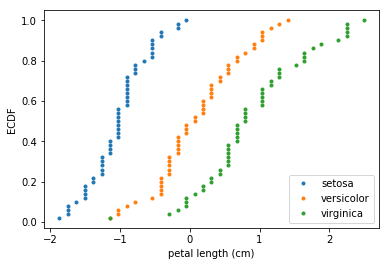

In [63]:
setosa=X[:50,0]
versicolor=X[50:100,0]
virginica=X[100:150,0]
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y= np.arange(1,n+1) / n

    return x, y

x_set, y_set=ecdf(setosa)
x_vers, y_vers=ecdf(versicolor)
x_virg, y_virg=ecdf(virginica)

# Plot all ECDFs on the same plot
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers,marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')



# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [64]:
# X = features
X = iris.data
# y = label
y = iris.target

In [74]:
#K nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=.6)
# KNN
knn= KNeighborsClassifier(n_neighbors=5)
# train
knn.fit(X_train, y_train)
# 预测
y_pred = knn.predict(X_test)
# accuracy_score
print(metrics.accuracy_score(y_test, y_pred))

0.9444444444444444


In [75]:
from sklearn.metrics import confusion_matrix,classification_report

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35  0  0]
 [ 0 28  1]
 [ 0  4 22]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       0.88      0.97      0.92        29
          2       0.96      0.85      0.90        26

avg / total       0.95      0.94      0.94        90



[0.97777778 0.94444444 0.95555556 0.94444444 0.94444444 0.95555556
 0.96666667 0.95555556 0.94444444 0.95555556 0.96666667 0.96666667
 0.97777778 0.95555556]


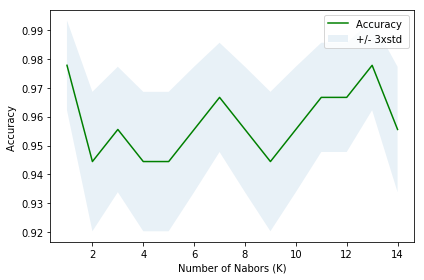

The best accuracy was with 0.9777777777777777 with k= 1


In [82]:
#We can calucalte the accuracy of KNN for different Ks.
Ks = 15
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))
ConfustionMx = [];
for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)



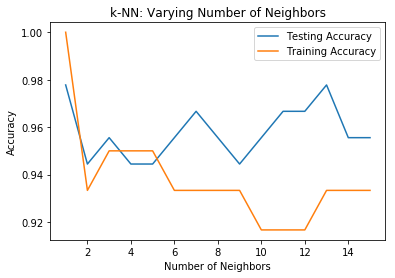

In [80]:
############################
##accuracy varies with k####
############################

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 16)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [81]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [79]:
scaler=StandardScaler()
kmeans=KNeighborsClassifier(n_neighbors=3)
pipeline=make_pipeline(scaler,kmeans)

pipeline.fit(X_train,y_train)
labels=pipeline.predict(X_test)

In [71]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':y_test})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])
ct

species,0,1,2
labels,,,
0,31,0,0
1,0,28,4
2,0,2,25
